## Group 13 Final Project - Data Job Position  on Glassdoor ##
#### Yuqing Gao ###
#### Jackie Liu ###
#### Wen Bi ###

In [1]:
import numpy as np # linear algebra
from numpy import median
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go


##### Looking at basic information about the dataset:

In [2]:
df = pd.read_csv('Cleaned_DS_Jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [3]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Type of ownership     object
Industry              object
Sector                object
Revenue               object
min_salary             int64
max_salary             int64
avg_salary             int64
job_state             object
same_state             int64
company_age            int64
python                 int64
excel                  int64
hadoop                 int64
spark                  int64
aws                    int64
tableau                int64
big_data               int64
job_simp              object
seniority             object
dtype: object

In [4]:
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 660
No. of columns in the dataset: 27


##### 1.Distribution of Rating Column and boxplot of company age

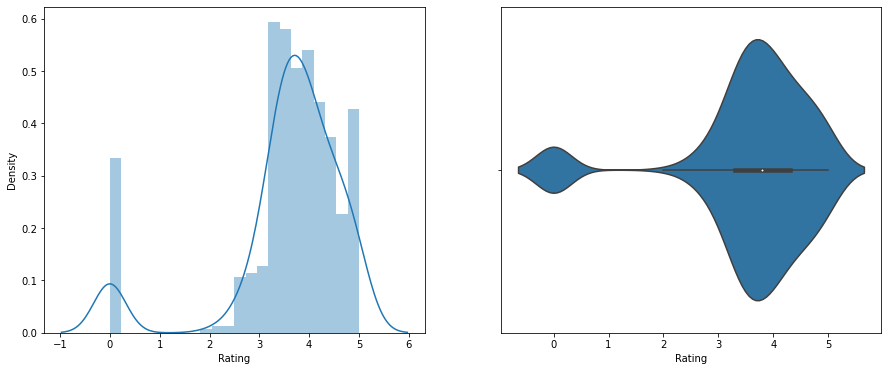

In [5]:
plt.figure(1 , figsize = (15 , 6))
plt.subplot(1 , 2  , 1)
sns.distplot(df['Rating'])

plt.subplot(1 , 2 , 2)
sns.violinplot(x = 'Rating' , data = df)

plt.show()

It follows a normal distribution. we would like replace 0 values with the mean of the distribution.

In [6]:
df["Rating"].unique()
# Replacing the -1 values in 'Rating' column with nan value.

df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==0 else x)


# Fill missing values with the mean of the distribution.

new_Rating = df["Rating"].fillna(df["Rating"].mean())

new_Rating.unique() 


array([3.1       , 4.2       , 3.8       , 3.5       , 2.9       ,
       3.9       , 4.4       , 3.6       , 4.5       , 4.7       ,
       3.7       , 3.4       , 3.2       , 4.3       , 2.8       ,
       5.        , 4.8       , 3.3       , 2.7       , 2.2       ,
       2.6       , 4.1       , 4.        , 2.5       , 4.9       ,
       2.4       , 3.88147541, 2.3       , 4.6       , 3.        ,
       2.1       , 2.        ])

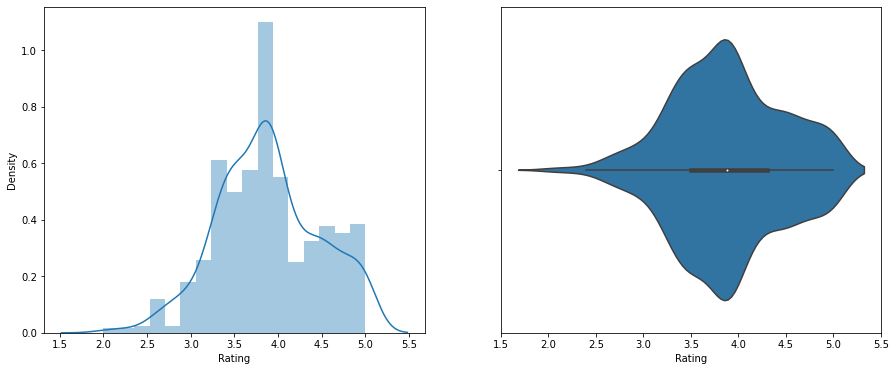

In [7]:
plt.figure(1 , figsize = (15 , 6))
plt.title('\n Distribution of Rating Column (after handling 0 values)\n', size=16, color='black')
plt.subplot(1 , 2  , 1)
sns.distplot(new_Rating)

plt.subplot(1 , 2 , 2)
sns.violinplot(x = new_Rating , data = df)

plt.show()

After replacing rating, we can see that the most of the companies are rated between 3.5 - 4.

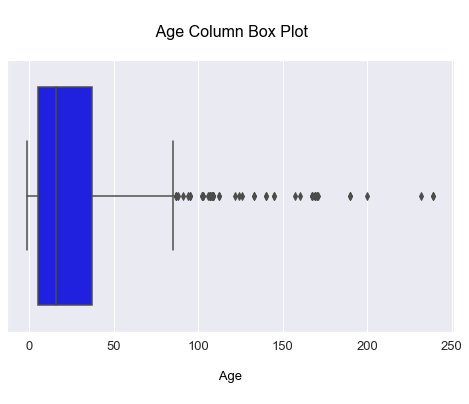

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(df.company_age,color="blue")
sns.set(style="darkgrid")
plt.title('\n Age Column Box Plot\n', size=16, color='Black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

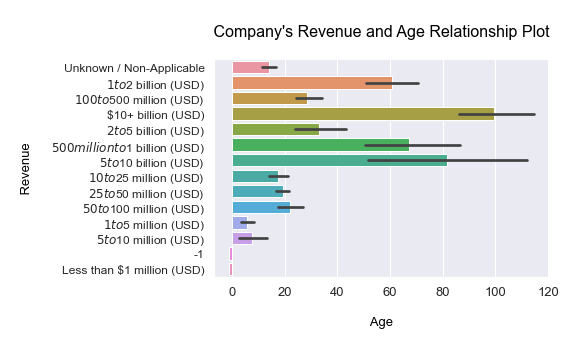

In [32]:
# Looking at the relation between company's age and revenue
sns.barplot(x="company_age",y="Revenue",data=df)
#Beautifying the plot

plt.title('\n Company\'s Revenue and Age Relationship Plot \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Revenue \n', fontsize=13, color='black')
plt.show()

It shows there are many outliners in the Age column, the median of company age is about 15 years. 
However,  old companies are larger in revenue. There are around 17% companies that are older than 100 years and make revenue of $10+ billion.


##### 2. Types of data jobs and average salaries

Text(0.5, 1.0, 'Job Title Count')

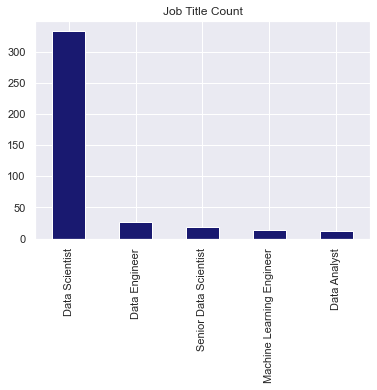

In [26]:
df['Job Title'].value_counts()
titles = df['Job Title'].value_counts().head(5)
titles.plot.bar(color = 'midnightblue')
plt.title('Job Title Count')

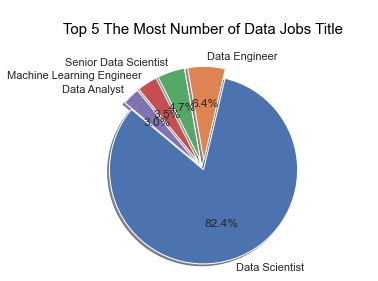

In [29]:
my_pie=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df['Job Title'].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df['Job Title'].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',
                          labels=labels,explode=my_pie,shadow=True,startangle=500)
                        
plt.title('\n Top 5 The Most Number of Data Jobs Title \n', size=15, color='black')

plt.axis('equal')


plt.show()

In the glassdoor website, most of the data jobs are about data scientists which about 82.4 % in the top 5 Titles.
Followed Job titles by data enginneer, Senior data Scientist, Machine Learning Engineer and Data Analyst.

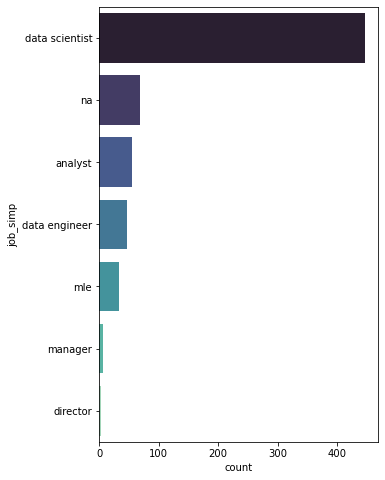

In [10]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y='job_simp',data=df,palette = 'mako', order= df['job_simp'].value_counts().index);

the top of simple data job is about data scientist, analyst, data engineer,and mfe.

In [11]:
salary=["avg_salary"]
df.groupby('job_simp')[salary].mean().sort_values("avg_salary",ascending=False)

,avg_salary
job_simp,
manager,137.857143
na,127.088235
director,127.000000
data scientist,125.266219
mle,118.058824
analyst,115.527273
data engineer,113.782609


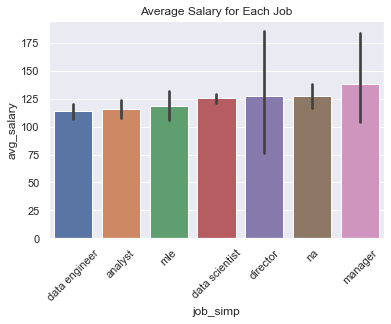

In [30]:
js_order = df.groupby('job_simp').avg_salary.agg('mean').sort_values().index
sns.barplot(x = 'job_simp', y = 'avg_salary', data = df,order=js_order)
plt.xticks(rotation =45)
plt.title('Average Salary for Each Job')
plt.show()

For the frequency of job titles, the highest average salary is for a manager, followed by director, data scientist, mle and analyst.

##### 3. States with the Number of Jobs.

 The jobs in 39 States


[Text(0.5, 1.0, 'Jobs By State')]

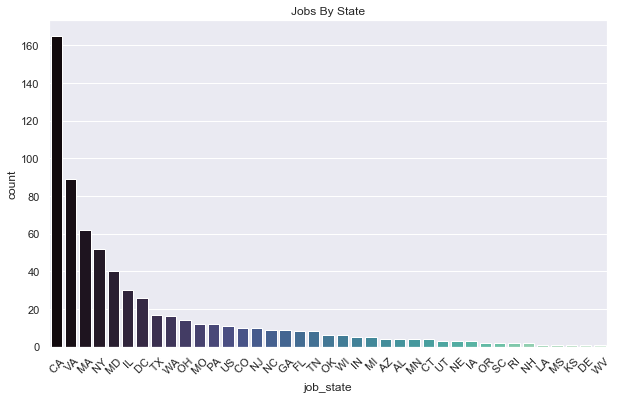

In [38]:
df["job_state"].nunique()
print(" The jobs in "+ str(df["job_state"].nunique()) + " States")

fig, ax = plt.subplots(figsize=(10,6)) 

sns.countplot(x='job_state',data=df,palette = 'mako', order= df['job_state'].value_counts().index);

plt.xticks(rotation =45)

ax.set(title="Jobs By State")





The work on the data is spread over 39 states. The largest number of jobs in California, followed by VA(Virginia), MA(Massachusetts), NY (New York),and MD (Maryland)

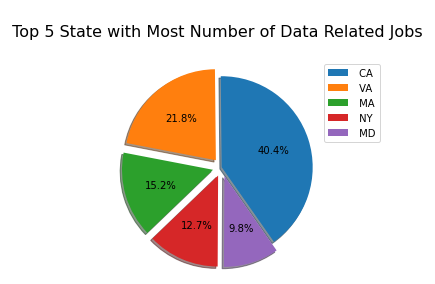

In [15]:
my_explode=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df["job_state"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["job_state"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 State with Most Number of Data Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

California has the most number of jobs, about 40.4%
Viginia, Massachusetts, New York, Maryland together has around 60% jobs.

In [16]:
salary=["avg_salary"]
df.groupby('job_simp')[salary].mean().sort_values("avg_salary",ascending=False)

,avg_salary
job_simp,
manager,137.857143
na,127.088235
director,127.000000
data scientist,125.266219
mle,118.058824
analyst,115.527273
data engineer,113.782609


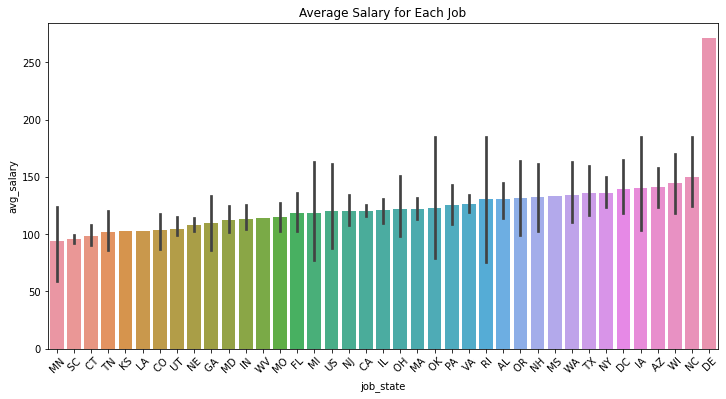

In [17]:
fig, ax = plt.subplots(figsize=(12,6)) 

st_order = df.groupby('job_state').avg_salary.agg('mean').sort_values().index

sns.barplot(x = 'job_state', y = 'avg_salary', data = df,order=st_order)
plt.xticks(rotation =45)
plt.title('Average Salary for Each Job')

plt.show()



Jobs about data are distributed across 39 states, the state with the highest average salary is Delaware, above 250K

In [18]:
# Data Scientist
ds = df[df["job_simp"]=="data scientist"].groupby(['job_state'])[salary].mean().sort_values('avg_salary',ascending=False)[0:10]

#Data Engineer
de = df[df["job_simp"]=="data engineer"].groupby(['job_state'])[salary].mean().sort_values('avg_salary',ascending=False)[0:10]
D
#Data Analyst
da = df[df["job_simp"]=="analyst"].groupby(['job_state'])[salary].mean().sort_values('avg_salary',ascending=False)[0:10]

#Machine Learning Engineer
mle = df[df["job_simp"]=="mle"].groupby(['job_state'])[salary].mean().sort_values('avg_salary',ascending=False)[0:10]

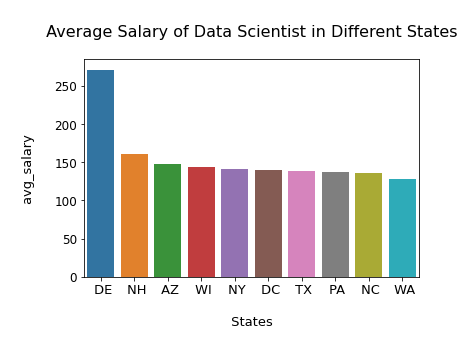

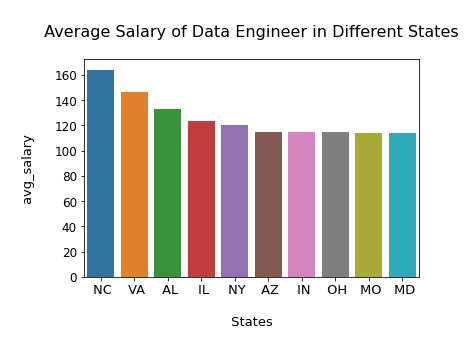

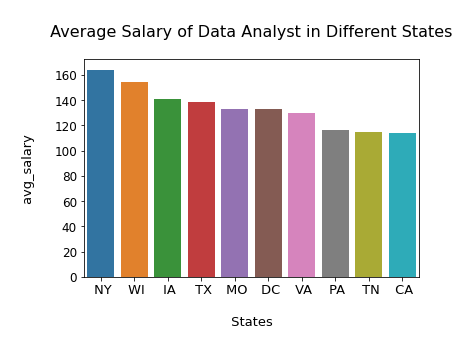

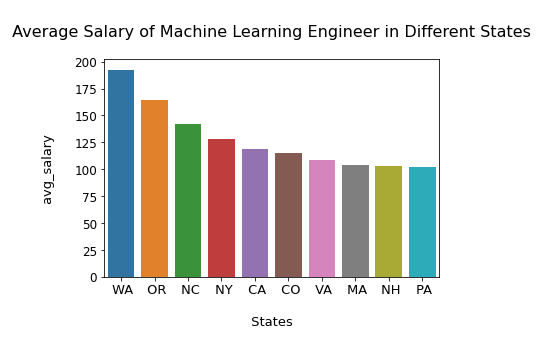

In [19]:


#Plot for Data Scientist

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= ds.index, y = ds['avg_salary'])
#Beautifying the plot
plt.title('\n Average Salary of Data Scientist in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n avg_salary \n', fontsize=13, color='black')

plt.show()

#Plot for data engineer

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= de.index, y = de['avg_salary'])
#Beautifying the plot
plt.title('\n Average Salary of Data Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n avg_salary \n', fontsize=13, color='black')

plt.show()

#Plot for Data Analyst

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= da.index, y = da['avg_salary'])
#Beautifying the plot
plt.title('\n Average Salary of Data Analyst in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n avg_salary \n', fontsize=13, color='black')

plt.show()

#Plot for Machine Learning Engineer

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= mle.index, y = mle['avg_salary'])
#Beautifying the plot
plt.title('\n Average Salary of Machine Learning Engineer in Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n avg_salary \n', fontsize=13, color='black')

plt.show()


Data Scientist
 Delaware (DE) offers highest average annual salary to Data Scientist, followed by New Hampshire (NH) ,Arizona (AZ). 

NC North Carolina offers the highest salary for Data Engineer, followed by Virginia and AL Alabama.
Data Analyst

Surprisingly, New York offers the highest salary to a Data Analyst, followed by WI Wisconsin.
Machine Learning Engineer

WA Washington offers the highest salary for ML Engineer, followed by Oregon .

##### 4 The most industries with Maximum Number of Data Related Job Postings

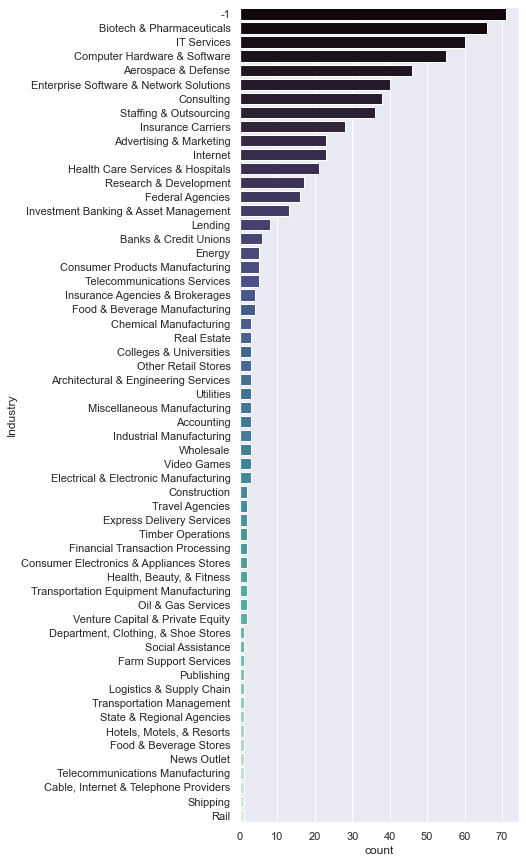

In [40]:
fig, ax = plt.subplots(figsize=(5,15))
sns.countplot(y='Industry',data=df,palette = 'mako', order= df['Industry'].value_counts().index);


In [42]:
sort_ind = df["Industry"].value_counts().sort_values(ascending=False).index

#Making a DF and sortring it w.r.t. sort_ind
ind = df.groupby("Industry")["max_salary","min_salary"].mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"].cat.set_categories(sort_ind, inplace=True)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind=ind.drop([0])


ind.head(5)






,index,Industry,max_salary,min_salary
1,51,Biotech & Pharmaceuticals,147.787879,97.954545
2,29,IT Services,142.266667,90.033333
3,47,Computer Hardware & Software,143.872727,98.072727
4,54,Aerospace & Defense,157.369565,108.021739
5,39,Enterprise Software & Network Solutions,139.350000,97.275000


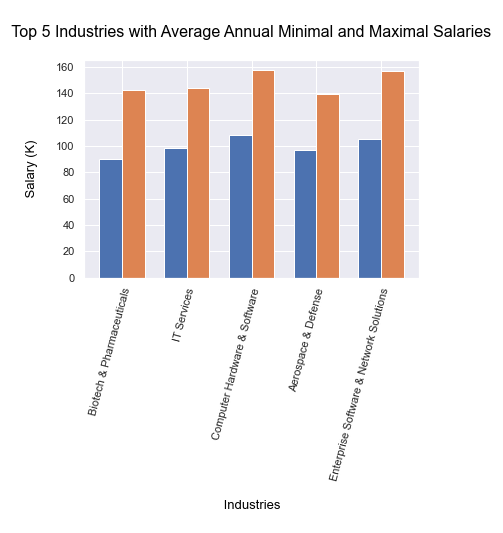

In [43]:
lab=[]
for i in sort_ind[1:6]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["min_salary"][1:6], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["max_salary"][1:6], width, label='Max avg Salary')

plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')

ax.set_xticks(x)
ax.set_xticklabels(lab)



#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.show()

In many industries, Bio-Pharmaceutical, IT Services, Computer Hardware Software,Aerospace and Enterprise Software with the better minimum and maximum wages.
Computer Hardware Software is the best.

In [ ]:
sns.lmplot(x='Rating',y='avg_salary',data=df)

#### Create a selection with type=’interval’: the the types of jobs in the minimum and maximum wage range

In [45]:
brush = alt.selection_interval()
type(brush)

altair.vegalite.v4.api.Selection

In [46]:
jobs = ['data scientist', 'analyst', 'mle', 'data engineer']
in_jobs = df['job_simp'].isin(jobs)
in_jobs.head()

0    True
1    True
2    True
3    True
4    True
Name: job_simp, dtype: bool

In [47]:
selected_data = df[in_jobs]
selected_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [48]:
# Q - quantitative / continuous
# N - nominal / a discrete unordered category
points = alt.Chart(selected_data).mark_point().encode(
    x='max_salary:Q',
    y='min_salary:Q',
    color=alt.condition(brush, 'job_simp:N', alt.value('lightgray'))
).add_selection(
    brush
)

type(points)

altair.vegalite.v4.api.Chart

In [49]:
bars = alt.Chart(selected_data).mark_bar().encode(
    x='count(job_simp):Q',
    y='job_simp:N',
    color='job_simp:N'
).transform_filter(
    brush
)

type(bars)

altair.vegalite.v4.api.Chart

In [50]:
charts= points & bars
charts

alt.VConcatChart(...)